### imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### data

In [2]:
train_df = pd.read_csv('train.csv').drop(labels='id', axis='columns')
test_df = pd.read_csv('test.csv').drop(labels='id', axis='columns')



### data transformation

In [3]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer()

In [4]:
def transform(data):
    data = qt.fit_transform(data)
    return data

In [5]:
def gender_encoding(map, data):
    data = [map[t] for t in data]
    return data

 ### transforming data

In [6]:
gender_map = {
    'I': 1,
    'F': 2,
    'M': 3
}

In [7]:
train_df['Sex'] = gender_encoding(gender_map, train_df['Sex'])
test_df['Sex'] = gender_encoding(gender_map, test_df['Sex'])


In [8]:
need_normalize = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# train_df[need_normalize] = transform(train_df[need_normalize])
# test_df[need_normalize] = transform(test_df[need_normalize])

In [9]:
train_df, test_df

(       Sex  Length  Diameter  Height     Weight  Shucked Weight  \
 0        1  1.5250    1.1750  0.3750  28.973189       12.728926   
 1        1  1.1000    0.8250  0.2750  10.418441        4.521745   
 2        3  1.3875    1.1125  0.3750  24.777463       11.339800   
 3        2  1.7000    1.4125  0.5000  50.660556       20.354941   
 4        1  1.2500    1.0125  0.3375  23.289114       11.977664   
 ...    ...     ...       ...     ...        ...             ...   
 74046    2  1.6625    1.2625  0.4375  50.660556       20.680960   
 74047    1  1.0750    0.8625  0.2750  10.446791        4.323299   
 74048    2  1.4875    1.2000  0.4125  29.483480       12.303683   
 74049    1  1.2125    0.9625  0.3125  16.768729        8.972617   
 74050    1  0.9125    0.6750  0.2000   5.386405        2.055339   
 
        Viscera Weight  Shell Weight  Age  
 0            6.647958      8.348928    9  
 1            2.324659      3.401940    8  
 2            5.556502      6.662133    9  
 3    

### model building

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
clf = RandomForestRegressor()
clf.fit(train_df.iloc[:, :-1], train_df['Age'])

RandomForestRegressor()

In [12]:
y_pred = clf.predict(test_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3da4b4430>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3da4b4970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3da4b4190>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3da4b4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3da4cb190>],
 'means': []}

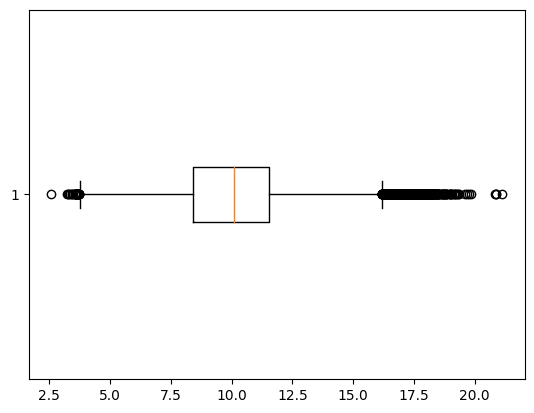

In [13]:
plt.boxplot(y_pred, vert=False)

In [18]:
np.amax(y_pred)

21.12

### submission

In [14]:
id = pd.read_csv('test.csv')

In [15]:
submission= id[['id']]
submission['Age'] = y_pred

C:\Users\coder\AppData\Local\Temp\ipykernel_6428\677669770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Age'] = y_pred


In [16]:
submission.to_csv('submission.csv', index=False)